<a href="https://colab.research.google.com/github/nhaidaar/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama : Muhammad Naufal Haidar Setyawan

> NIM : 2241720097

> Kelas : TI-3F

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library
import numpy as np
from google.colab.patches import cv2_imshow
import cv2 as cv
import matplotlib.pyplot as plt
import math
from PIL import Image as im

In [3]:
# Konvulasi Citra
def convolution2d(image, kernel, stride=1, padding=0):
    # Get image and kernel dimensions
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Flip the kernel (for convolution)
    kernel = np.flipud(np.fliplr(kernel))

    # Add padding to the image
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    # Calculate the dimensions of the output
    output_h = (image_h + 2 * padding - kernel_h) // stride + 1
    output_w = (image_w + 2 * padding - kernel_w) // stride + 1

    # Initialize the output matrix
    output = np.zeros((output_h, output_w))

    # Perform the convolution operation
    for y in range(0, output_h):
        for x in range(0, output_w):
            # Extract the region of interest from the image
            y_start, x_start = y * stride, x * stride
            y_end, x_end = y_start + kernel_h, x_start + kernel_w
            region = image_padded[y_start:y_end, x_start:x_end]

            # Perform element-wise multiplication and sum
            output[y, x] = np.sum(region * kernel)

    return output

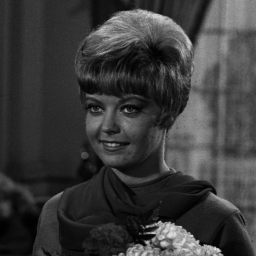

In [4]:
# Load image
img = cv.imread('/content/drive/MyDrive/S5_PCVK/Assets/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img)

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

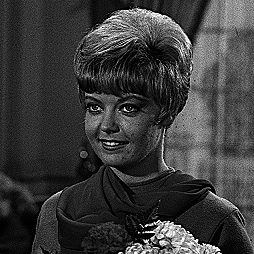

In [5]:
# Sharpen
output = convolution2d(img, kernel_sharpen, stride=1, padding=0)
cv2_imshow(output)

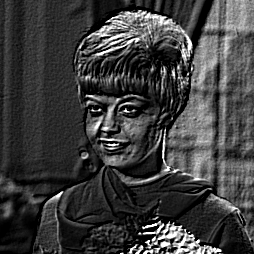

In [6]:
# Emboss
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])
output = convolution2d(img, kernel_emboss, stride=1, padding=0)
cv2_imshow(output)

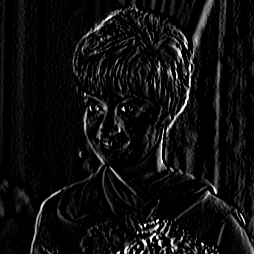

In [7]:
# Left Sobel Edge Detection
kernel_sobel_x = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
output = convolution2d(img, kernel_sobel_x, stride=1, padding=0)
cv2_imshow(output)

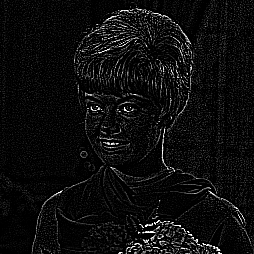

In [8]:
# Canny Edge Detection
kernel_cany = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])
output = convolution2d(img, kernel_cany, stride=1, padding=0)
cv2_imshow(output)

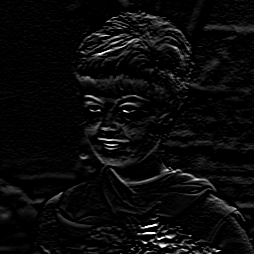

In [9]:
# Prewitt Edge Detection
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
output = convolution2d(img, kernel_prewitt, stride=1, padding=0)
cv2_imshow(output)

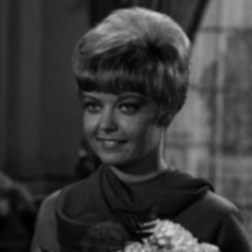

In [10]:
# 5x5 Gaussian Blur
kernel_gaussian_blur =(1/256) * np.array([[1, 4, 6, 4, 1],
                                      [4, 16, 24, 16, 4],
                                      [6, 24, 36, 24, 6],
                                      [4, 16, 24, 16, 4],
                                      [1, 4, 6, 4, 1]])
output = convolution2d(img, kernel_gaussian_blur, stride=1, padding=0)
cv2_imshow(output)

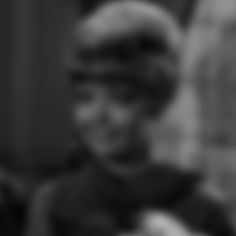

In [11]:
# 21x21 Gaussian Blur
# Define kernel size and calculate sigma
kernel_size = 21
sigma = math.sqrt(kernel_size)

# Generate a 1D Gaussian kernel using OpenCV
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)

# Create the 2D Gaussian kernel by multiplying the 1D kernel with its transpose
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

output = convolution2d(img, gaussian_kernel_2d, stride=1, padding=0)
cv2_imshow(output)